<a href="https://colab.research.google.com/github/Purukan-Jeremy/SentimentAnalysis_on_HSR_Tweet/blob/master/FINALEXPERTPURUKAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Installing Modules & getting the necessary files for "Google Colab"
Jika dijalankan di komputer lokal (PC/Laptop) silahkan unduh secara manual dan
lakukan instalasi module di terminal/command prompt
"""
print("Detecting environment: ", end=' ')
try:
  import google.colab
  IN_COLAB = True
  print("Running the code in Google Colab. Installing and downloading dependencies.\nPlease wait...")
  import nltk
  !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/lib/taudataNlpTm.py
  !mkdir data
  !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
  !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
  !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
  !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/corpus_sederhana.txt
  !pip install unidecode textblob sastrawi
  nltk.download('popular')
except:
  IN_COLAB = False
  print("Running the code locally.")

Detecting environment:  Running the code in Google Colab. Installing and downloading dependencies.
Please wait...
--2024-05-03 05:51:24--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/lib/taudataNlpTm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-05-03 05:51:24 ERROR 404: Not Found.

--2024-05-03 05:51:25--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-05-03 05:51:25 ERROR 404: Not Found.

--2024-05-03 05:51:

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://deb.nodesource.com/node_20.x nodistro InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 229 kB in 3s (90.1 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ca-certificates is alrea

**Crawl data pertama 600+ (LATEST TWEETS) ada bking 1000 mar t limit cuma smpe 600an**

In [ ]:
# Crawl Data by jeremy
!npm install -g npm@10.6.0
filename = 'hsrjeremy.csv'
search_keyword = ["honkaistarrail"]
limit = 1000
!npx -y tweet-harvest@2.6.0 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {'f2b3a2999140e0cf95f621a95074128027b0e9f8'}


changed 13 packages in 4s

24 packages are looking for funding
  run `npm fund` for details

> npx
> tweet-harvest -o hsrjeremy.csv -s ['honkaistarrail'] --tab LATEST -l 1000 --token f2b3a2999140e0cf95f621a95074128027b0e9f8

Tweet Harvest [v2.6.0]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


-- Scrolling... (1)
Filling in keywords: ['honkaistarrail']

 (2) (3)

Your tweets saved to: /content/tweets-data/hsrjeremy.csv
Total tweets saved: 16

-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/hsrjeremy.csv
Total tweets saved: 31

-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/hsrjeremy.csv
Total tweets saved: 46

-- Scrolling... (1)

Your tweet

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
#jeremy
file_path = "/content/tweets-data/hsrjeremy.csv"

df = pd.read_csv(file_path)
df = df.rename(columns={'full_text': 'hsr_tweet'}) #ganti nama kolom krna saya bukan kaum normies
display(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,conversation_id_str,created_at,favorite_count,hsr_tweet,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1786012581448343961,Thu May 02 12:39:16 +0000 2024,3,Cosplay/崩壊スターレイル 鏡流 #Jingliu :@tasuku_0522 #Ho...,1786012581448343961,https://pbs.twimg.com/media/GMkw-UVbsAAKw0J.jpg,NaN,ja,NaN,0,1,1,https://twitter.com/azxxx_013/status/178601258...,1268666875,azxxx_013
1,1786012071441907935,Thu May 02 12:37:14 +0000 2024,0,Star Rail LIVE 2024 | Honkai: Star Rail https:...,1786012071441907935,NaN,NaN,ja,Niigata city,0,0,0,https://twitter.com/tamuken556/status/17860120...,1588183590,tamuken556
2,1786012018861826339,Thu May 02 12:37:02 +0000 2024,0,#Blade #bladehsr #hsr #honkaistarrail https://...,1786012018861826339,https://pbs.twimg.com/media/GMkwdy_WMAEduAx.jpg,NaN,qme,NaN,0,0,0,https://twitter.com/000cxm0/status/17860120188...,1507071834252062729,000cxm0
3,1786011866206273641,Thu May 02 12:36:26 +0000 2024,1,STRICTLY SELLING HSR ACCOUNT TL70 ASIA MOST IN...,1786011866206273641,https://pbs.twimg.com/media/GMkwUg0aEAArPCB.jpg,NaN,en,"+63, RT HEAVY",1,1,2,https://twitter.com/n0LONGERhman/status/178601...,2898523868,n0LONGERhman
4,1785895347954303377,Thu May 02 12:35:23 +0000 2024,0,@citroncynique If I remembered correctly the o...,1786011605207273724,NaN,citroncynique,en,NaN,0,0,0,https://twitter.com/CommissarMin/status/178601...,1585259987370094592,CommissarMin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,1785882163273142553,Thu May 02 04:02:56 +0000 2024,0,@honkaistarrail WE LOVE YOU ROBIN,1785882643143307535,NaN,honkaistarrail,en,NaN,0,0,0,https://twitter.com/seany91402/status/17858826...,1312460375405846529,seany91402
640,1785882163273142553,Thu May 02 04:02:56 +0000 2024,0,@Tuont0 @honkaistarrail HALLO :D,1785882639712297094,NaN,Tuont0,in,"✧.* 22, she/her, demi.",0,0,0,https://twitter.com/luvchuuzai/status/17858826...,1600666785421860865,luvchuuzai
641,1785882163273142553,Thu May 02 04:02:55 +0000 2024,0,@Tuont0 @honkaistarrail HALLLOOOO :D!!,1785882639179579761,NaN,Tuont0,in,United States,0,0,0,https://twitter.com/akitoyyas/status/178588263...,1778272574465564672,akitoyyas
642,1785882163273142553,Thu May 02 04:02:54 +0000 2024,4,@Tuont0 @honkaistarrail HALLOO :D,1785882635073421594,NaN,Tuont0,en,NaN,0,0,0,https://twitter.com/sh1msooae/status/178588263...,1150602620358352896,sh1msooae



**Crawl Data Kedua 500+ (TOP TWEETS)**

In [ ]:
# Crawl Data by jeremy
!npm install -g npm@10.6.0
filename = 'hsrjeremy2.csv'
search_keyword = ["honkaistarrail"]
limit = 550
!npx -y tweet-harvest@2.6.0 -o "{filename}" -s "{search_keyword}" --tab "TOP" -l {limit} --token {'f2b3a2999140e0cf95f621a95074128027b0e9f8'}


changed 13 packages in 3s

24 packages are looking for funding
  run `npm fund` for details

> npx
> tweet-harvest -o hsrjeremy2.csv -s ['honkaistarrail'] --tab TOP -l 550 --token f2b3a2999140e0cf95f621a95074128027b0e9f8

Tweet Harvest [v2.6.0]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


Filling in keywords: ['honkaistarrail']


-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/hsrjeremy2.csv
Total tweets saved: 19

-- Scrolling... (1) (2) (3) (4)

Your tweets saved to: /content/tweets-data/hsrjeremy2.csv
Total tweets saved: 39

-- Scrolling... (1) (2) (3) (4) (5) (6)

Your tweets saved to: /content/tweets-data/hsrjeremy2.csv
Total tweets saved: 59

-- Scro

In [ ]:
file_path = "/content/tweets-data/hsrjeremy2.csv"

df = pd.read_csv(file_path)
df = df.rename(columns={'full_text': 'hsr_tweet'}) #ganti nama kolom krna saya bukan kaum normies
display(df)

,conversation_id_str,created_at,favorite_count,hsr_tweet,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1785982018901471385,Thu May 02 10:37:49 +0000 2024,6776,kafka #HonkaiStarRail https://t.co/QT6yOaLVBZ,1785982018901471385,https://pbs.twimg.com/media/GMkVLbHaAAADcBW.jpg,NaN,in,お仕事のご依頼はDM orメールまで,30,78,639,https://twitter.com/Chocolat_cos0/status/17859...,1130126474889973763,Chocolat_cos0
1,1785868987282387424,Thu May 02 03:08:41 +0000 2024,32435,#HonkaiStarRail #firefly 萤火 https://t.co/I5rZH...,1785868987282387424,https://pbs.twimg.com/media/GMiuX18agAAEfim.jpg,NaN,ja,People's Republic of China,19,14,5560,https://twitter.com/issign/status/178586898728...,378484086,issign
2,1785971268753539507,Thu May 02 09:55:06 +0000 2024,615,ブートヒル #HonkaiStarRail #Boothill https://t.co/c...,1785971268753539507,https://pbs.twimg.com/media/GMkLZsxbsAAUAOr.jpg,NaN,ja,@pisson_s ( ✶ ▽✶ ),4,1,152,https://twitter.com/xuripit/status/17859712687...,1410582711626915842,xuripit
3,1785954718885511486,Thu May 02 08:49:21 +0000 2024,2399,ホタル #HonkaiStarRail #崩壊スターレイル https://t.co/2kD...,1785954718885511486,https://pbs.twimg.com/media/GMj8WQIbAAAYJC5.jpg,NaN,ja,NaN,2,1,415,https://twitter.com/bobmob_suponge/status/1785...,1248814268599783424,bobmob_suponge
4,1786009319739408787,Thu May 02 12:26:18 +0000 2024,693,ロビン #崩壊スターレイル #HonkaiStarRail #Robin https://t...,1786009319739408787,https://pbs.twimg.com/media/GMkttpgbEAAq5qE.jpg,NaN,ja,korea,1,3,102,https://twitter.com/Indol_5/status/17860093197...,1220158356863639552,Indol_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,1783390989283151913,Thu Apr 25 07:02:00 +0000 2024,5639,姫子×カフカ #HonkaiStarRail ＃崩壊スターレイル ＃himeko #kafk...,1783390989283151913,https://pbs.twimg.com/media/GL7n9wXaQAAgCV5.jpg,NaN,ja,NaN,1,5,426,https://twitter.com/lightning0730_/status/1783...,1624281945495703552,lightning0730_
561,1783413636276662643,Thu Apr 25 08:31:59 +0000 2024,5225,붕괴: 스타레일의 1주년을 진심으로 축하드립니다 #스타레일 #HSRHBD #Honk...,1783413636276662643,https://pbs.twimg.com/media/GL_1IjvaoAAA1lC.jpg,NaN,ko,NaN,16,2,985,https://twitter.com/gcmzi/status/1783413636276...,518486749,gcmzi
562,1783468587363213444,Thu Apr 25 12:10:21 +0000 2024,1393,「無題」 #崩壊スターレイル #honkaistarrail #Sparkle #花火 ht...,1783468587363213444,https://pbs.twimg.com/media/GMAnOkYagAAQYG0.jpg,NaN,ja,NaN,1,1,220,https://twitter.com/sinon_0819/status/17834685...,1446594189823655941,sinon_0819
563,1782988281874874485,Wed Apr 24 04:21:47 +0000 2024,1340,Jade #HonkaiStarRail #HSR #Jade https://t.co/D...,1782988281874874485,https://pbs.twimg.com/media/GL5yYG_XcAEqA9w.jpg,NaN,es,NaN,11,3,134,https://twitter.com/W0rldRail/status/178298828...,1720549617635385344,W0rldRail


**Penggabungan kedua data frame Crawl data tweet 1 dan 2 bjir lah wkwkwk elon bking susah**

In [ ]:
df1 = pd.read_csv('/content/tweets-data/hsrjeremy.csv')
df2 = pd.read_csv('/content/tweets-data/hsrjeremy2.csv')
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df.to_csv('hsrfinal.csv', index=False)

**FILE GABUNGAN DI DOWNLOAD DAN DI UPLOAD PQT P DRIVE SNDIRI (SUPAYA SO ND MO CRAWL DATA ULANG KLO QT CLOSE TAB)**

In [ ]:
file_path = "/content/drive/MyDrive/hsrfinal.csv"

df = pd.read_csv(file_path)
df = df.rename(columns={'full_text': 'hsr_tweet'}) #ganti nama kolom krna saya bukan kaum normies
display(df)

,conversation_id_str,created_at,favorite_count,hsr_tweet,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1786012581448343961,Thu May 02 12:39:16 +0000 2024,3,Cosplay/崩壊スターレイル 鏡流 #Jingliu :@tasuku_0522 #Ho...,1786012581448343961,https://pbs.twimg.com/media/GMkw-UVbsAAKw0J.jpg,NaN,ja,NaN,0,1,1,https://twitter.com/azxxx_013/status/178601258...,1268666875,azxxx_013
1,1786012071441907935,Thu May 02 12:37:14 +0000 2024,0,Star Rail LIVE 2024 | Honkai: Star Rail https:...,1786012071441907935,NaN,NaN,ja,Niigata city,0,0,0,https://twitter.com/tamuken556/status/17860120...,1588183590,tamuken556
2,1786012018861826339,Thu May 02 12:37:02 +0000 2024,0,#Blade #bladehsr #hsr #honkaistarrail https://...,1786012018861826339,https://pbs.twimg.com/media/GMkwdy_WMAEduAx.jpg,NaN,qme,NaN,0,0,0,https://twitter.com/000cxm0/status/17860120188...,1507071834252062729,000cxm0
3,1786011866206273641,Thu May 02 12:36:26 +0000 2024,1,STRICTLY SELLING HSR ACCOUNT TL70 ASIA MOST IN...,1786011866206273641,https://pbs.twimg.com/media/GMkwUg0aEAArPCB.jpg,NaN,en,"+63, RT HEAVY",1,1,2,https://twitter.com/n0LONGERhman/status/178601...,2898523868,n0LONGERhman
4,1785895347954303377,Thu May 02 12:35:23 +0000 2024,0,@citroncynique If I remembered correctly the o...,1786011605207273724,NaN,citroncynique,en,NaN,0,0,0,https://twitter.com/CommissarMin/status/178601...,1585259987370094592,CommissarMin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,1783390989283151913,Thu Apr 25 07:02:00 +0000 2024,5639,姫子×カフカ #HonkaiStarRail ＃崩壊スターレイル ＃himeko #kafk...,1783390989283151913,https://pbs.twimg.com/media/GL7n9wXaQAAgCV5.jpg,NaN,ja,NaN,1,5,426,https://twitter.com/lightning0730_/status/1783...,1624281945495703552,lightning0730_
1205,1783413636276662643,Thu Apr 25 08:31:59 +0000 2024,5225,붕괴: 스타레일의 1주년을 진심으로 축하드립니다 #스타레일 #HSRHBD #Honk...,1783413636276662643,https://pbs.twimg.com/media/GL_1IjvaoAAA1lC.jpg,NaN,ko,NaN,16,2,985,https://twitter.com/gcmzi/status/1783413636276...,518486749,gcmzi
1206,1783468587363213444,Thu Apr 25 12:10:21 +0000 2024,1393,「無題」 #崩壊スターレイル #honkaistarrail #Sparkle #花火 ht...,1783468587363213444,https://pbs.twimg.com/media/GMAnOkYagAAQYG0.jpg,NaN,ja,NaN,1,1,220,https://twitter.com/sinon_0819/status/17834685...,1446594189823655941,sinon_0819
1207,1782988281874874485,Wed Apr 24 04:21:47 +0000 2024,1340,Jade #HonkaiStarRail #HSR #Jade https://t.co/D...,1782988281874874485,https://pbs.twimg.com/media/GL5yYG_XcAEqA9w.jpg,NaN,es,NaN,11,3,134,https://twitter.com/W0rldRail/status/178298828...,1720549617635385344,W0rldRail


**PRE-PROCESING DATA**

**LOWERCASING**

In [ ]:
import re
df['hsr_tweet'] = df['hsr_tweet'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df

,conversation_id_str,created_at,favorite_count,hsr_tweet,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1786012581448343961,Thu May 02 12:39:16 +0000 2024,3,cosplay/崩壊スターレイル 鏡流 #jingliu :@tasuku_0522 #ho...,1786012581448343961,https://pbs.twimg.com/media/GMkw-UVbsAAKw0J.jpg,NaN,ja,NaN,0,1,1,https://twitter.com/azxxx_013/status/178601258...,1268666875,azxxx_013
1,1786012071441907935,Thu May 02 12:37:14 +0000 2024,0,star rail live 2024 | honkai: star rail https:...,1786012071441907935,NaN,NaN,ja,Niigata city,0,0,0,https://twitter.com/tamuken556/status/17860120...,1588183590,tamuken556
2,1786012018861826339,Thu May 02 12:37:02 +0000 2024,0,#blade #bladehsr #hsr #honkaistarrail https://...,1786012018861826339,https://pbs.twimg.com/media/GMkwdy_WMAEduAx.jpg,NaN,qme,NaN,0,0,0,https://twitter.com/000cxm0/status/17860120188...,1507071834252062729,000cxm0
3,1786011866206273641,Thu May 02 12:36:26 +0000 2024,1,strictly selling hsr account tl70 asia most in...,1786011866206273641,https://pbs.twimg.com/media/GMkwUg0aEAArPCB.jpg,NaN,en,"+63, RT HEAVY",1,1,2,https://twitter.com/n0LONGERhman/status/178601...,2898523868,n0LONGERhman
4,1785895347954303377,Thu May 02 12:35:23 +0000 2024,0,@citroncynique if i remembered correctly the o...,1786011605207273724,NaN,citroncynique,en,NaN,0,0,0,https://twitter.com/CommissarMin/status/178601...,1585259987370094592,CommissarMin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,1783390989283151913,Thu Apr 25 07:02:00 +0000 2024,5639,姫子×カフカ #honkaistarrail ＃崩壊スターレイル ＃himeko #kafk...,1783390989283151913,https://pbs.twimg.com/media/GL7n9wXaQAAgCV5.jpg,NaN,ja,NaN,1,5,426,https://twitter.com/lightning0730_/status/1783...,1624281945495703552,lightning0730_
1205,1783413636276662643,Thu Apr 25 08:31:59 +0000 2024,5225,붕괴: 스타레일의 1주년을 진심으로 축하드립니다 #스타레일 #hsrhbd #honk...,1783413636276662643,https://pbs.twimg.com/media/GL_1IjvaoAAA1lC.jpg,NaN,ko,NaN,16,2,985,https://twitter.com/gcmzi/status/1783413636276...,518486749,gcmzi
1206,1783468587363213444,Thu Apr 25 12:10:21 +0000 2024,1393,「無題」 #崩壊スターレイル #honkaistarrail #sparkle #花火 ht...,1783468587363213444,https://pbs.twimg.com/media/GMAnOkYagAAQYG0.jpg,NaN,ja,NaN,1,1,220,https://twitter.com/sinon_0819/status/17834685...,1446594189823655941,sinon_0819
1207,1782988281874874485,Wed Apr 24 04:21:47 +0000 2024,1340,jade #honkaistarrail #hsr #jade https://t.co/d...,1782988281874874485,https://pbs.twimg.com/media/GL5yYG_XcAEqA9w.jpg,NaN,es,NaN,11,3,134,https://twitter.com/W0rldRail/status/178298828...,1720549617635385344,W0rldRail


**HAPUS URL YANG MUNGKIN ADA DI TWEET**

In [ ]:
url_pattern = r'https?://\S+'
def remove_urls(text):
    return re.sub(url_pattern, '', text)
df['hsr_tweet'] = df['hsr_tweet'].apply(remove_urls)
df

,conversation_id_str,created_at,favorite_count,hsr_tweet,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1786012581448343961,Thu May 02 12:39:16 +0000 2024,3,cosplay崩壊スターレイル 鏡流 jingliu tasuku_0522 honkais...,1786012581448343961,https://pbs.twimg.com/media/GMkw-UVbsAAKw0J.jpg,NaN,ja,NaN,0,1,1,https://twitter.com/azxxx_013/status/178601258...,1268666875,azxxx_013
1,1786012071441907935,Thu May 02 12:37:14 +0000 2024,0,star rail live 2024 honkai star rail youtube...,1786012071441907935,NaN,NaN,ja,Niigata city,0,0,0,https://twitter.com/tamuken556/status/17860120...,1588183590,tamuken556
2,1786012018861826339,Thu May 02 12:37:02 +0000 2024,0,blade bladehsr hsr honkaistarrail,1786012018861826339,https://pbs.twimg.com/media/GMkwdy_WMAEduAx.jpg,NaN,qme,NaN,0,0,0,https://twitter.com/000cxm0/status/17860120188...,1507071834252062729,000cxm0
3,1786011866206273641,Thu May 02 12:36:26 +0000 2024,1,strictly selling hsr account tl70 asia most in...,1786011866206273641,https://pbs.twimg.com/media/GMkwUg0aEAArPCB.jpg,NaN,en,"+63, RT HEAVY",1,1,2,https://twitter.com/n0LONGERhman/status/178601...,2898523868,n0LONGERhman
4,1785895347954303377,Thu May 02 12:35:23 +0000 2024,0,citroncynique if i remembered correctly the on...,1786011605207273724,NaN,citroncynique,en,NaN,0,0,0,https://twitter.com/CommissarMin/status/178601...,1585259987370094592,CommissarMin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,1783390989283151913,Thu Apr 25 07:02:00 +0000 2024,5639,姫子カフカ honkaistarrail 崩壊スターレイル himeko kafka,1783390989283151913,https://pbs.twimg.com/media/GL7n9wXaQAAgCV5.jpg,NaN,ja,NaN,1,5,426,https://twitter.com/lightning0730_/status/1783...,1624281945495703552,lightning0730_
1205,1783413636276662643,Thu Apr 25 08:31:59 +0000 2024,5225,붕괴 스타레일의 1주년을 진심으로 축하드립니다 스타레일 hsrhbd honkaist...,1783413636276662643,https://pbs.twimg.com/media/GL_1IjvaoAAA1lC.jpg,NaN,ko,NaN,16,2,985,https://twitter.com/gcmzi/status/1783413636276...,518486749,gcmzi
1206,1783468587363213444,Thu Apr 25 12:10:21 +0000 2024,1393,無題 崩壊スターレイル honkaistarrail sparkle 花火,1783468587363213444,https://pbs.twimg.com/media/GMAnOkYagAAQYG0.jpg,NaN,ja,NaN,1,1,220,https://twitter.com/sinon_0819/status/17834685...,1446594189823655941,sinon_0819
1207,1782988281874874485,Wed Apr 24 04:21:47 +0000 2024,1340,jade honkaistarrail hsr jade,1782988281874874485,https://pbs.twimg.com/media/GL5yYG_XcAEqA9w.jpg,NaN,es,NaN,11,3,134,https://twitter.com/W0rldRail/status/178298828...,1720549617635385344,W0rldRail


**Remove Punctuation**

In [ ]:
df['hsr_tweet'] = df['hsr_tweet'].apply(lambda x:  re.sub(r'[^\w\s]','',x))
df

,conversation_id_str,created_at,favorite_count,hsr_tweet,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1786012581448343961,Thu May 02 12:39:16 +0000 2024,3,cosplay崩壊スターレイル 鏡流 jingliu tasuku_0522 honkais...,1786012581448343961,https://pbs.twimg.com/media/GMkw-UVbsAAKw0J.jpg,NaN,ja,NaN,0,1,1,https://twitter.com/azxxx_013/status/178601258...,1268666875,azxxx_013
1,1786012071441907935,Thu May 02 12:37:14 +0000 2024,0,star rail live 2024 honkai star rail youtube...,1786012071441907935,NaN,NaN,ja,Niigata city,0,0,0,https://twitter.com/tamuken556/status/17860120...,1588183590,tamuken556
2,1786012018861826339,Thu May 02 12:37:02 +0000 2024,0,blade bladehsr hsr honkaistarrail,1786012018861826339,https://pbs.twimg.com/media/GMkwdy_WMAEduAx.jpg,NaN,qme,NaN,0,0,0,https://twitter.com/000cxm0/status/17860120188...,1507071834252062729,000cxm0
3,1786011866206273641,Thu May 02 12:36:26 +0000 2024,1,strictly selling hsr account tl70 asia most in...,1786011866206273641,https://pbs.twimg.com/media/GMkwUg0aEAArPCB.jpg,NaN,en,"+63, RT HEAVY",1,1,2,https://twitter.com/n0LONGERhman/status/178601...,2898523868,n0LONGERhman
4,1785895347954303377,Thu May 02 12:35:23 +0000 2024,0,citroncynique if i remembered correctly the on...,1786011605207273724,NaN,citroncynique,en,NaN,0,0,0,https://twitter.com/CommissarMin/status/178601...,1585259987370094592,CommissarMin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,1783390989283151913,Thu Apr 25 07:02:00 +0000 2024,5639,姫子カフカ honkaistarrail 崩壊スターレイル himeko kafka,1783390989283151913,https://pbs.twimg.com/media/GL7n9wXaQAAgCV5.jpg,NaN,ja,NaN,1,5,426,https://twitter.com/lightning0730_/status/1783...,1624281945495703552,lightning0730_
1205,1783413636276662643,Thu Apr 25 08:31:59 +0000 2024,5225,붕괴 스타레일의 1주년을 진심으로 축하드립니다 스타레일 hsrhbd honkaist...,1783413636276662643,https://pbs.twimg.com/media/GL_1IjvaoAAA1lC.jpg,NaN,ko,NaN,16,2,985,https://twitter.com/gcmzi/status/1783413636276...,518486749,gcmzi
1206,1783468587363213444,Thu Apr 25 12:10:21 +0000 2024,1393,無題 崩壊スターレイル honkaistarrail sparkle 花火,1783468587363213444,https://pbs.twimg.com/media/GMAnOkYagAAQYG0.jpg,NaN,ja,NaN,1,1,220,https://twitter.com/sinon_0819/status/17834685...,1446594189823655941,sinon_0819
1207,1782988281874874485,Wed Apr 24 04:21:47 +0000 2024,1340,jade honkaistarrail hsr jade,1782988281874874485,https://pbs.twimg.com/media/GL5yYG_XcAEqA9w.jpg,NaN,es,NaN,11,3,134,https://twitter.com/W0rldRail/status/178298828...,1720549617635385344,W0rldRail


**REMOVE STOPWORDS**

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['hsr_tweet'] = df['hsr_tweet'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,conversation_id_str,created_at,favorite_count,hsr_tweet,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1786012581448343961,Thu May 02 12:39:16 +0000 2024,3,cosplay崩壊スターレイル 鏡流 jingliu tasuku_0522 honkais...,1786012581448343961,https://pbs.twimg.com/media/GMkw-UVbsAAKw0J.jpg,NaN,ja,NaN,0,1,1,https://twitter.com/azxxx_013/status/178601258...,1268666875,azxxx_013
1,1786012071441907935,Thu May 02 12:37:14 +0000 2024,0,star rail live 2024 honkai star rail youtubeより...,1786012071441907935,NaN,NaN,ja,Niigata city,0,0,0,https://twitter.com/tamuken556/status/17860120...,1588183590,tamuken556
2,1786012018861826339,Thu May 02 12:37:02 +0000 2024,0,blade bladehsr hsr honkaistarrail,1786012018861826339,https://pbs.twimg.com/media/GMkwdy_WMAEduAx.jpg,NaN,qme,NaN,0,0,0,https://twitter.com/000cxm0/status/17860120188...,1507071834252062729,000cxm0
3,1786011866206273641,Thu May 02 12:36:26 +0000 2024,1,strictly selling hsr account tl70 asia infos a...,1786011866206273641,https://pbs.twimg.com/media/GMkwUg0aEAArPCB.jpg,NaN,en,"+63, RT HEAVY",1,1,2,https://twitter.com/n0LONGERhman/status/178601...,2898523868,n0LONGERhman
4,1785895347954303377,Thu May 02 12:35:23 +0000 2024,0,citroncynique remembered correctly one person ...,1786011605207273724,NaN,citroncynique,en,NaN,0,0,0,https://twitter.com/CommissarMin/status/178601...,1585259987370094592,CommissarMin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,1783390989283151913,Thu Apr 25 07:02:00 +0000 2024,5639,姫子カフカ honkaistarrail 崩壊スターレイル himeko kafka,1783390989283151913,https://pbs.twimg.com/media/GL7n9wXaQAAgCV5.jpg,NaN,ja,NaN,1,5,426,https://twitter.com/lightning0730_/status/1783...,1624281945495703552,lightning0730_
1205,1783413636276662643,Thu Apr 25 08:31:59 +0000 2024,5225,붕괴 스타레일의 1주년을 진심으로 축하드립니다 스타레일 hsrhbd honkaist...,1783413636276662643,https://pbs.twimg.com/media/GL_1IjvaoAAA1lC.jpg,NaN,ko,NaN,16,2,985,https://twitter.com/gcmzi/status/1783413636276...,518486749,gcmzi
1206,1783468587363213444,Thu Apr 25 12:10:21 +0000 2024,1393,無題 崩壊スターレイル honkaistarrail sparkle 花火,1783468587363213444,https://pbs.twimg.com/media/GMAnOkYagAAQYG0.jpg,NaN,ja,NaN,1,1,220,https://twitter.com/sinon_0819/status/17834685...,1446594189823655941,sinon_0819
1207,1782988281874874485,Wed Apr 24 04:21:47 +0000 2024,1340,jade honkaistarrail hsr jade,1782988281874874485,https://pbs.twimg.com/media/GL5yYG_XcAEqA9w.jpg,NaN,es,NaN,11,3,134,https://twitter.com/W0rldRail/status/178298828...,1720549617635385344,W0rldRail


**TEXT STANDARDIZATION**

In [ ]:
!pip install textblob

**BTW FILE SLANG ENGLISH BIKIN SENDIRI GENERATE keys : values pake coding (bangga banget gweh, nntw klo btul)**

In [ ]:
s = open('/content/drive/MyDrive/PurukanEnglishSlang.txt', 'r', encoding='utf-8', errors='replace')
slangS = s.readlines()
s.close()

In [ ]:
slangS = [t.strip('\n').strip() for t in slangS]
#lelah cuy
slangS = [t.split(":") for t in slangS]
slangS = [[k.strip(), v.strip()] for k,v in slangS]
slangS = {k:v for k,v in slangS}

In [ ]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

def kse_ilang_slang(text):
  T = TextBlob(text).words
  for i,t in enumerate(T):
    if t in slangS.keys():
      T[i] = slangS[t]
  return ' '.join(T)

df['hsr_tweet'] = df['hsr_tweet'].apply(kse_ilang_slang)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,conversation_id_str,created_at,favorite_count,hsr_tweet,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1786012581448343961,Thu May 02 12:39:16 +0000 2024,3,cosplay崩壊スターレイル 鏡流 jingliu tasuku_0522 honkais...,1786012581448343961,https://pbs.twimg.com/media/GMkw-UVbsAAKw0J.jpg,NaN,ja,NaN,0,1,1,https://twitter.com/azxxx_013/status/178601258...,1268666875,azxxx_013
1,1786012071441907935,Thu May 02 12:37:14 +0000 2024,0,star rail live 2024 honkai star rail youtubeより...,1786012071441907935,NaN,NaN,ja,Niigata city,0,0,0,https://twitter.com/tamuken556/status/17860120...,1588183590,tamuken556
2,1786012018861826339,Thu May 02 12:37:02 +0000 2024,0,blade bladehsr hsr honkaistarrail,1786012018861826339,https://pbs.twimg.com/media/GMkwdy_WMAEduAx.jpg,NaN,qme,NaN,0,0,0,https://twitter.com/000cxm0/status/17860120188...,1507071834252062729,000cxm0
3,1786011866206273641,Thu May 02 12:36:26 +0000 2024,1,strictly selling hsr account tl70 asia infos a...,1786011866206273641,https://pbs.twimg.com/media/GMkwUg0aEAArPCB.jpg,NaN,en,"+63, RT HEAVY",1,1,2,https://twitter.com/n0LONGERhman/status/178601...,2898523868,n0LONGERhman
4,1785895347954303377,Thu May 02 12:35:23 +0000 2024,0,citroncynique remembered correctly one person ...,1786011605207273724,NaN,citroncynique,en,NaN,0,0,0,https://twitter.com/CommissarMin/status/178601...,1585259987370094592,CommissarMin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,1783390989283151913,Thu Apr 25 07:02:00 +0000 2024,5639,姫子カフカ honkaistarrail 崩壊スターレイル himeko kafka,1783390989283151913,https://pbs.twimg.com/media/GL7n9wXaQAAgCV5.jpg,NaN,ja,NaN,1,5,426,https://twitter.com/lightning0730_/status/1783...,1624281945495703552,lightning0730_
1205,1783413636276662643,Thu Apr 25 08:31:59 +0000 2024,5225,붕괴 스타레일의 1주년을 진심으로 축하드립니다 스타레일 hsrhbd honkaist...,1783413636276662643,https://pbs.twimg.com/media/GL_1IjvaoAAA1lC.jpg,NaN,ko,NaN,16,2,985,https://twitter.com/gcmzi/status/1783413636276...,518486749,gcmzi
1206,1783468587363213444,Thu Apr 25 12:10:21 +0000 2024,1393,無題 崩壊スターレイル honkaistarrail sparkle 花火,1783468587363213444,https://pbs.twimg.com/media/GMAnOkYagAAQYG0.jpg,NaN,ja,NaN,1,1,220,https://twitter.com/sinon_0819/status/17834685...,1446594189823655941,sinon_0819
1207,1782988281874874485,Wed Apr 24 04:21:47 +0000 2024,1340,jade honkaistarrail hsr jade,1782988281874874485,https://pbs.twimg.com/media/GL5yYG_XcAEqA9w.jpg,NaN,es,NaN,11,3,134,https://twitter.com/W0rldRail/status/178298828...,1720549617635385344,W0rldRail


**SPELLING CORRECTION (paling lama b tggu)**

In [ ]:
df['hsr_tweet'].apply(lambda x: str (TextBlob(x).correct()))
df

,conversation_id_str,created_at,favorite_count,hsr_tweet,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1786012581448343961,Thu May 02 12:39:16 +0000 2024,3,cosplay崩壊スターレイル 鏡流 jingliu tasuku_0522 honkais...,1786012581448343961,https://pbs.twimg.com/media/GMkw-UVbsAAKw0J.jpg,NaN,ja,NaN,0,1,1,https://twitter.com/azxxx_013/status/178601258...,1268666875,azxxx_013
1,1786012071441907935,Thu May 02 12:37:14 +0000 2024,0,star rail live 2024 honkai star rail youtubeより...,1786012071441907935,NaN,NaN,ja,Niigata city,0,0,0,https://twitter.com/tamuken556/status/17860120...,1588183590,tamuken556
2,1786012018861826339,Thu May 02 12:37:02 +0000 2024,0,blade bladehsr hsr honkaistarrail,1786012018861826339,https://pbs.twimg.com/media/GMkwdy_WMAEduAx.jpg,NaN,qme,NaN,0,0,0,https://twitter.com/000cxm0/status/17860120188...,1507071834252062729,000cxm0
3,1786011866206273641,Thu May 02 12:36:26 +0000 2024,1,strictly selling hsr account tl70 asia infos a...,1786011866206273641,https://pbs.twimg.com/media/GMkwUg0aEAArPCB.jpg,NaN,en,"+63, RT HEAVY",1,1,2,https://twitter.com/n0LONGERhman/status/178601...,2898523868,n0LONGERhman
4,1785895347954303377,Thu May 02 12:35:23 +0000 2024,0,citroncynique remembered correctly one person ...,1786011605207273724,NaN,citroncynique,en,NaN,0,0,0,https://twitter.com/CommissarMin/status/178601...,1585259987370094592,CommissarMin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,1783390989283151913,Thu Apr 25 07:02:00 +0000 2024,5639,姫子カフカ honkaistarrail 崩壊スターレイル himeko kafka,1783390989283151913,https://pbs.twimg.com/media/GL7n9wXaQAAgCV5.jpg,NaN,ja,NaN,1,5,426,https://twitter.com/lightning0730_/status/1783...,1624281945495703552,lightning0730_
1205,1783413636276662643,Thu Apr 25 08:31:59 +0000 2024,5225,붕괴 스타레일의 1주년을 진심으로 축하드립니다 스타레일 hsrhbd honkaist...,1783413636276662643,https://pbs.twimg.com/media/GL_1IjvaoAAA1lC.jpg,NaN,ko,NaN,16,2,985,https://twitter.com/gcmzi/status/1783413636276...,518486749,gcmzi
1206,1783468587363213444,Thu Apr 25 12:10:21 +0000 2024,1393,無題 崩壊スターレイル honkaistarrail sparkle 花火,1783468587363213444,https://pbs.twimg.com/media/GMAnOkYagAAQYG0.jpg,NaN,ja,NaN,1,1,220,https://twitter.com/sinon_0819/status/17834685...,1446594189823655941,sinon_0819
1207,1782988281874874485,Wed Apr 24 04:21:47 +0000 2024,1340,jade honkaistarrail hsr jade,1782988281874874485,https://pbs.twimg.com/media/GL5yYG_XcAEqA9w.jpg,NaN,es,NaN,11,3,134,https://twitter.com/W0rldRail/status/178298828...,1720549617635385344,W0rldRail


**LEMMATISASI**

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

st = WordNetLemmatizer()

df['hsr_tweet']=df['hsr_tweet'].apply(lambda x:" ".join(st.lemmatize(word)for word in x.split()))
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,conversation_id_str,created_at,favorite_count,hsr_tweet,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1786012581448343961,Thu May 02 12:39:16 +0000 2024,3,cosplay崩壊スターレイル 鏡流 jingliu tasuku_0522 honkais...,1786012581448343961,https://pbs.twimg.com/media/GMkw-UVbsAAKw0J.jpg,NaN,ja,NaN,0,1,1,https://twitter.com/azxxx_013/status/178601258...,1268666875,azxxx_013
1,1786012071441907935,Thu May 02 12:37:14 +0000 2024,0,star rail live 2024 honkai star rail youtubeより...,1786012071441907935,NaN,NaN,ja,Niigata city,0,0,0,https://twitter.com/tamuken556/status/17860120...,1588183590,tamuken556
2,1786012018861826339,Thu May 02 12:37:02 +0000 2024,0,blade bladehsr hsr honkaistarrail,1786012018861826339,https://pbs.twimg.com/media/GMkwdy_WMAEduAx.jpg,NaN,qme,NaN,0,0,0,https://twitter.com/000cxm0/status/17860120188...,1507071834252062729,000cxm0
3,1786011866206273641,Thu May 02 12:36:26 +0000 2024,1,strictly selling hsr account tl70 asia info at...,1786011866206273641,https://pbs.twimg.com/media/GMkwUg0aEAArPCB.jpg,NaN,en,"+63, RT HEAVY",1,1,2,https://twitter.com/n0LONGERhman/status/178601...,2898523868,n0LONGERhman
4,1785895347954303377,Thu May 02 12:35:23 +0000 2024,0,citroncynique remembered correctly one person ...,1786011605207273724,NaN,citroncynique,en,NaN,0,0,0,https://twitter.com/CommissarMin/status/178601...,1585259987370094592,CommissarMin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,1783390989283151913,Thu Apr 25 07:02:00 +0000 2024,5639,姫子カフカ honkaistarrail 崩壊スターレイル himeko kafka,1783390989283151913,https://pbs.twimg.com/media/GL7n9wXaQAAgCV5.jpg,NaN,ja,NaN,1,5,426,https://twitter.com/lightning0730_/status/1783...,1624281945495703552,lightning0730_
1205,1783413636276662643,Thu Apr 25 08:31:59 +0000 2024,5225,붕괴 스타레일의 1주년을 진심으로 축하드립니다 스타레일 hsrhbd honkaist...,1783413636276662643,https://pbs.twimg.com/media/GL_1IjvaoAAA1lC.jpg,NaN,ko,NaN,16,2,985,https://twitter.com/gcmzi/status/1783413636276...,518486749,gcmzi
1206,1783468587363213444,Thu Apr 25 12:10:21 +0000 2024,1393,無題 崩壊スターレイル honkaistarrail sparkle 花火,1783468587363213444,https://pbs.twimg.com/media/GMAnOkYagAAQYG0.jpg,NaN,ja,NaN,1,1,220,https://twitter.com/sinon_0819/status/17834685...,1446594189823655941,sinon_0819
1207,1782988281874874485,Wed Apr 24 04:21:47 +0000 2024,1340,jade honkaistarrail hsr jade,1782988281874874485,https://pbs.twimg.com/media/GL5yYG_XcAEqA9w.jpg,NaN,es,NaN,11,3,134,https://twitter.com/W0rldRail/status/178298828...,1720549617635385344,W0rldRail


**FEATURING ENGINEERING TF-IDF, MODELING, PERFORMANCE ACCURACY**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from io import StringIO
import seaborn as sns

Data = pd.read_csv("/content/drive/MyDrive/hsrfinal.csv",encoding='latin-1')

Data.dtypes

conversation_id_str         int64
created_at                 object
favorite_count              int64
full_text                  object
id_str                      int64
image_url                  object
in_reply_to_screen_name    object
lang                       object
location                   object
quote_count                 int64
reply_count                 int64
retweet_count               int64
tweet_url                  object
user_id_str                 int64
username                   object
dtype: object

In [ ]:
Data = Data[['lang', 'full_text']]
Data = Data[pd.notnull(Data['full_text'])]

# See top 5 rows
Data.head()

,lang,full_text
0,ja,Cosplay/å´©å£ã¹ã¿ã¼ã¬ã¤ã« é¡æµ #Jingl...
1,ja,Star Rail LIVE 2024 | Honkai: Star Rail https:...
2,qme,#Blade #bladehsr #hsr #honkaistarrail https://...
3,en,STRICTLY SELLING HSR ACCOUNT TL70 ASIA MOST IN...
4,en,@citroncynique If I remembered correctly the o...


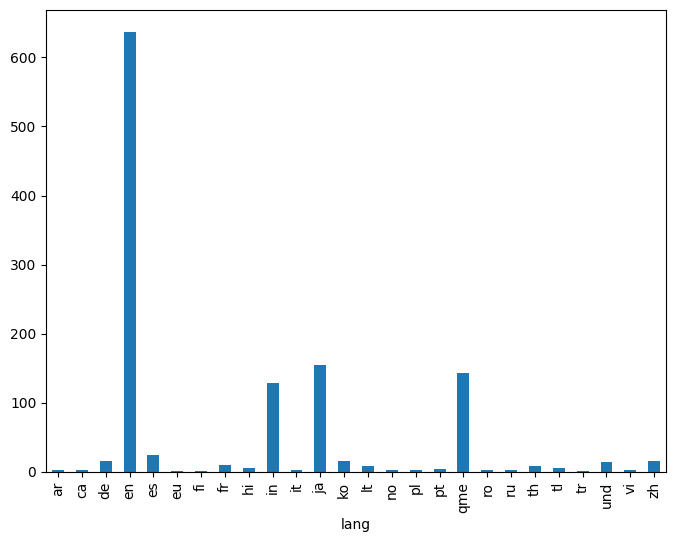

In [ ]:
# Check the distribution of complaints by category
Data.groupby('lang').full_text.count()


# Lets plot it and see
fig = plt.figure(figsize=(8,6))
Data.groupby('lang').full_text.count().plot.bar(ylim=0)
plt.show()


In [ ]:
Data['category_id'] = Data['lang'].factorize()[0]

Data.head()

,lang,full_text,category_id
0,ja,Cosplay/å´©å£ã¹ã¿ã¼ã¬ã¤ã« é¡æµ #Jingl...,0
1,ja,Star Rail LIVE 2024 | Honkai: Star Rail https:...,0
2,qme,#Blade #bladehsr #hsr #honkaistarrail https://...,1
3,en,STRICTLY SELLING HSR ACCOUNT TL70 ASIA MOST IN...,2
4,en,@citroncynique If I remembered correctly the o...,2


In [ ]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(Data['full_text'], Data['lang'])

In [ ]:
valid_y

30       ja
93       ca
711      in
1142     en
1115     ja
       ... 
1168     en
590      in
1064     en
80       en
117     qme
Name: lang, Length: 303, dtype: object

In [ ]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
valid_y

array([16,  2,  6,  1,  1,  1,  5,  5,  1,  1,  1,  1,  5,  1,  1,  1,  1,
        1,  5,  5,  1,  1,  1, 10,  1,  1,  5,  1,  1,  0,  6,  1,  1,  1,
       10,  7,  5, 13,  1,  1,  1,  6,  5, 10,  1,  1,  1,  5,  1,  1,  5,
        1, 10,  6, 12,  1,  1,  6,  0,  1, 12, 10,  1,  1, 10,  5,  1,  1,
       16,  3,  1,  5,  1,  3,  6,  1,  1,  1,  1, 10,  1,  1,  1,  1,  5,
        1,  2,  1,  1,  1,  6,  1, 10,  5,  1,  6, 10,  5, 10,  1,  5,  1,
        1, 10,  1,  5,  6,  1, 10, 10, 10,  1,  1,  1,  1,  1,  1,  5,  1,
        6, 12, 10,  1,  5,  1,  1,  1,  1,  1,  1,  5,  6, 10,  1,  1,  5,
        1,  5,  1,  1,  1,  6,  1, 10,  5,  1,  1,  1,  6,  1,  1,  1, 10,
        1,  1,  1,  5,  1,  1, 10,  1,  1,  1,  1,  1,  6,  1,  1,  1, 10,
        1,  6,  1,  6,  1,  1,  1,  1,  1,  8,  1,  5,  1,  1,  1,  1,  1,
        1, 10,  6,  7,  1,  6,  1, 10,  1,  1,  1,  1,  1,  5, 10,  4,  1,
        5,  5,  1,  5,  1,  1,  5,  6,  1,  1,  1,  1,  1,  1,  1,  1,  5,
        1,  1, 10, 10,  6

In [ ]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
tfidf_vect = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(Data['full_text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [ ]:
xtrain_tfidf

<906x4309 sparse matrix of type '<class 'numpy.float64'>'
	with 12388 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics import classification_report

model = linear_model.LogisticRegression().fit(xtrain_tfidf, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

accuracy = metrics.accuracy_score(model.predict(xvalid_tfidf), valid_y)
print ("Accuracy: ", accuracy)

y_pred = model.predict(xvalid_tfidf)
report = classification_report(valid_y, y_pred)

print("Classification Report:")
print(report)

Accuracy:  0.009900990099009901
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00       174
           2       0.00      0.00      0.00         3
           3       0.01      1.00      0.02         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        39
           6       0.00      0.00      0.00        35
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00        31
          11       0.02      1.00      0.04         1
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

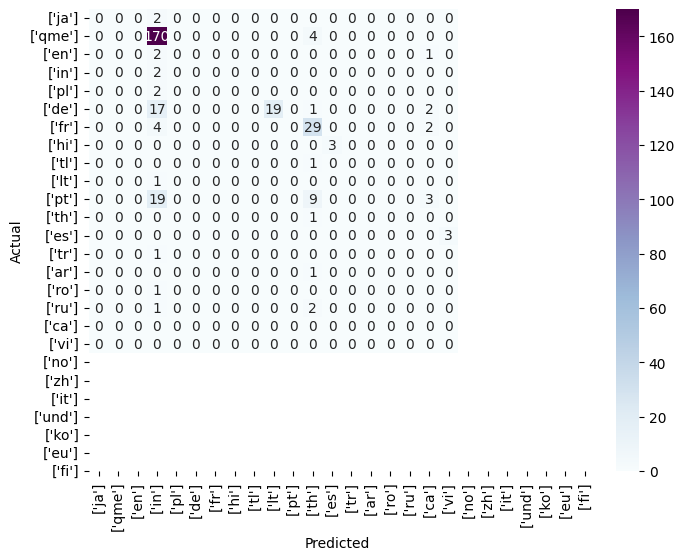

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(valid_y, model.predict(xvalid_tfidf))

# Vizualizing confusion matrix

category_id_df = Data[['lang', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'lang']].values)


fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="BuPu",
            xticklabels=category_id_df[['lang']].values,
            yticklabels=category_id_df[['lang']].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
